# Illustration of Discovered Directions
This notebook demonstrates the editing capabilities of the discovered directions over examples. The pipeline used is EditingPipeline, which expands the CFG update with edit directions.

In [1]:
from PIL import Image
from pipelines.editing_pipeline import EditingPipeline

import matplotlib.pyplot as plt

from utils.image_utils import NullInversion, load_512

from transformers import CLIPTokenizer, CLIPTextModel

/home/grads/ydalva/miniconda3/envs/noiseclr/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = "cuda"

pipe = EditingPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", safety_checker=None).to(device)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Loading pipeline components...: 100%|██████████| 6/6 [00:00<00:00, 11.43it/s]
You have disabled the safety checker for <class 'pipelines.editing_pipeline.EditingPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


## FFHQ Directions
Below, 5 directions are provided from the FFHQ model trained for 2000 iterations. In the tuple set below, the direction index, start and end steps of the edit and the editing scale used are provided.

In [3]:
# Direction, edit start step, edit end step, edit scale
directions = (
    ("<t49>", 35, 50, 10), # Indian
    ("<t36>", 35, 50, 10), # Asian
    ("<t2>", 35, 50, 10), # Lipstick
    ("<t48>", 35, 50, 10), # Mustache
    ("<t57>", 35, 50, 10), # Eyebrows
)

We load the text encoder and the tokenizer to the pipeline, which are the components adjusted for the learned directions.

In [4]:
# Loading the pipeline - only the changed elements for directions
tokenizer = CLIPTokenizer.from_pretrained("models/ffhq_dirs/tokenizer")
text_encoder = CLIPTextModel.from_pretrained("models/ffhq_dirs/text_encoder").to(device)

pipe.tokenizer = tokenizer
pipe.text_encoder = text_encoder

inverter = NullInversion(pipe, device)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


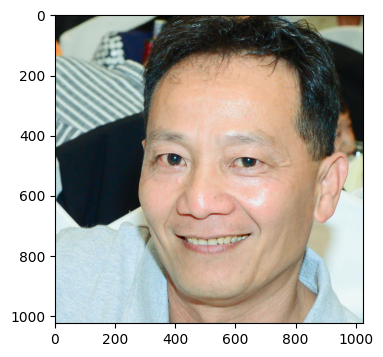

In [5]:
img_path = "images/00176.png"
img_raw = Image.open(img_path)
img_np = load_512(img_raw, *(0,0,0,0), width=512, height=512)
inverter.init_prompt("")
_, ddim_latents = inverter.ddim_inversion(img_np)
initial_latent = ddim_latents[-1]
plt.figure(figsize=(4,4))
plt.imshow(img_raw)

In [6]:
edited_images = []
# Indian
out = pipe(prompt="", latents=initial_latent, editing_scale=directions[0][3], is_real_image=True,
    editing_prompt=directions[0][0], height=512, width=512, start_step=directions[0][1], end_step=directions[0][2], num_inference_steps=50).images[0]
edited_images.append(out)

# Asian
out = pipe(prompt="", latents=initial_latent, editing_scale=directions[1][3], is_real_image=True,
    editing_prompt=directions[1][0], height=512, width=512, start_step=directions[1][1], end_step=directions[1][2], num_inference_steps=50).images[0]
edited_images.append(out)

# Lipstick
out = pipe(prompt="", latents=initial_latent, editing_scale=directions[2][3], is_real_image=True,
    editing_prompt=directions[2][0], height=512, width=512, start_step=directions[2][1], end_step=directions[2][2], num_inference_steps=50).images[0]
edited_images.append(out)

# Mustache
out = pipe(prompt="", latents=initial_latent, editing_scale=directions[3][3], is_real_image=True,
    editing_prompt=directions[3][0], height=512, width=512, start_step=directions[3][1], end_step=directions[3][2], num_inference_steps=50).images[0]
edited_images.append(out)

# Eyebrows
out = pipe(prompt="", latents=initial_latent, editing_scale=directions[4][3], is_real_image=True,
    editing_prompt=directions[4][0], height=512, width=512, start_step=directions[4][1], end_step=directions[4][2], num_inference_steps=50).images[0]
edited_images.append(out)

 34%|███▍      | 17/50 [00:00<00:01, 24.02it/s]

100%|██████████| 50/50 [00:03<00:00, 15.04it/s]


Below, the editing results are demonstrated as a grid. In the respective order, the indian, asian, lipstick, mustache and eyebrows edits are demonstrated.

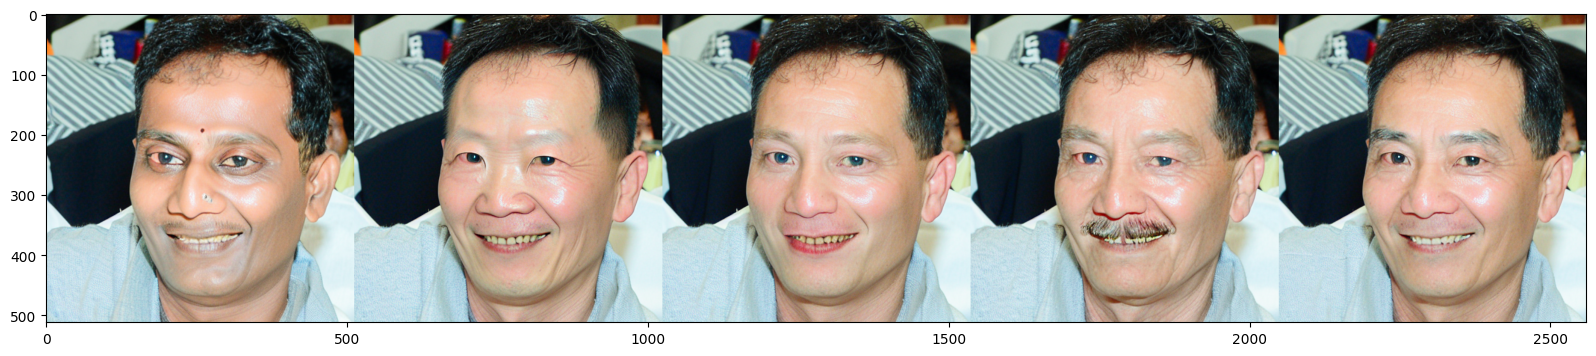

In [7]:
from utils.image_utils import image_grid

grid = image_grid(edited_images, 1, len(edited_images))
plt.figure(figsize=(20, 4))
plt.imshow(grid)

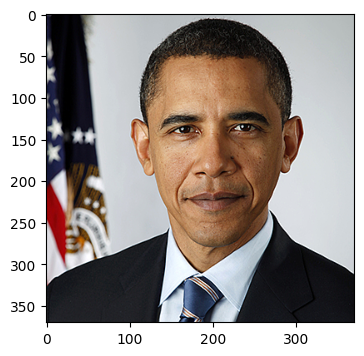

In [8]:
img_path = "images/obama.png"
img_raw = Image.open(img_path)
img_np = load_512(img_raw, *(0,0,0,0), width=512, height=512)
inverter.init_prompt("")
_, ddim_latents = inverter.ddim_inversion(img_np)
initial_latent = ddim_latents[-1]
plt.figure(figsize=(4,4))
plt.imshow(img_raw)

In addition to the previous examples, the face edits are shown on an additional image to show that they are not image specific and generalizable.

 76%|███████▌  | 38/50 [00:01<00:00, 14.22it/s]

100%|██████████| 50/50 [00:03<00:00, 14.79it/s]


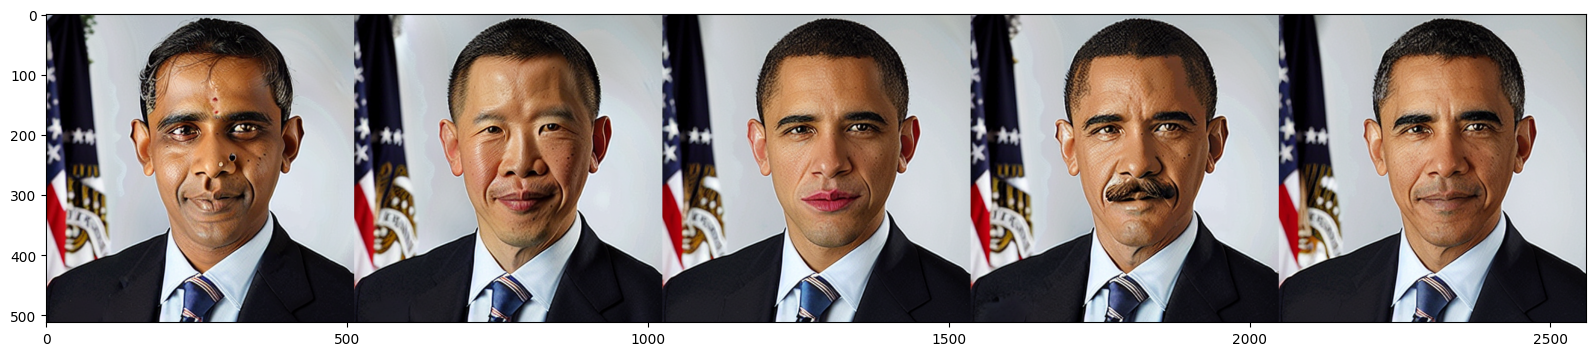

In [9]:
edited_images = []
# Indian
out = pipe(prompt="", latents=initial_latent, editing_scale=directions[0][3], is_real_image=True,
    editing_prompt=directions[0][0], height=512, width=512, start_step=directions[0][1], end_step=directions[0][2], num_inference_steps=50).images[0]
edited_images.append(out)

# Asian
out = pipe(prompt="", latents=initial_latent, editing_scale=directions[1][3], is_real_image=True,
    editing_prompt=directions[1][0], height=512, width=512, start_step=directions[1][1], end_step=directions[1][2], num_inference_steps=50).images[0]
edited_images.append(out)

# Lipstick
out = pipe(prompt="", latents=initial_latent, editing_scale=directions[2][3], is_real_image=True,
    editing_prompt=directions[2][0], height=512, width=512, start_step=directions[2][1], end_step=directions[2][2], num_inference_steps=50).images[0]
edited_images.append(out)

# Mustache
out = pipe(prompt="", latents=initial_latent, editing_scale=directions[3][3], is_real_image=True,
    editing_prompt=directions[3][0], height=512, width=512, start_step=directions[3][1], end_step=directions[3][2], num_inference_steps=50).images[0]
edited_images.append(out)

# Eyebrows
out = pipe(prompt="", latents=initial_latent, editing_scale=directions[4][3], is_real_image=True,
    editing_prompt=directions[4][0], height=512, width=512, start_step=directions[4][1], end_step=directions[4][2], num_inference_steps=50).images[0]
edited_images.append(out)

grid = image_grid(edited_images, 1, len(edited_images))
plt.figure(figsize=(20, 4))
plt.imshow(grid)

## Interpolating the Directions
By adjusting the editing scale, the directions can be interpolated semantically.

 22%|██▏       | 11/50 [00:00<00:01, 22.75it/s]

100%|██████████| 50/50 [00:03<00:00, 14.48it/s]


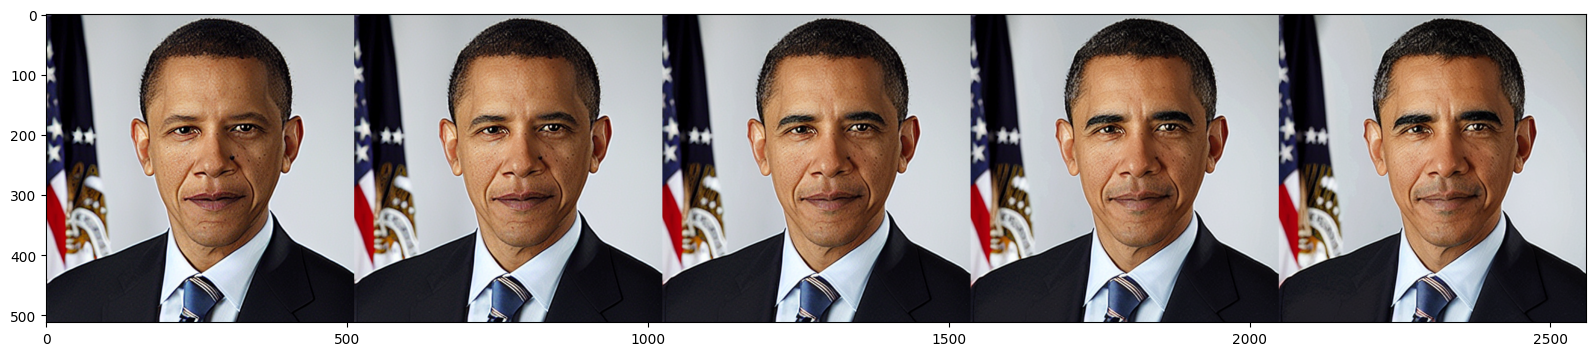

In [10]:
edited_images = []
scales = [-10, -5, 0, 5, 10]
for scale in scales:
    out = pipe(prompt="", latents=initial_latent, editing_scale=scale, is_real_image=True,
        editing_prompt=directions[4][0], height=512, width=512, start_step=directions[4][1], end_step=directions[4][2], num_inference_steps=50).images[0]
    edited_images.append(out)

grid = image_grid(edited_images, 1, len(edited_images))
plt.figure(figsize=(20, 4))
plt.imshow(grid)

## Art Directions

For the art directions, 5 examples are provided below. The loaded model is trained for 1600 iterations over artistic paintings.

In [11]:
pipe.tokenizer = CLIPTokenizer.from_pretrained("models/art_dirs/tokenizer")
pipe.text_encoder = CLIPTextModel.from_pretrained("models/art_dirs/text_encoder").to(device)

inverter = NullInversion(pipe, device)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


These directions also follow a similar setup, where the set of direction entries include the name assigned to the direction, start and end steps, and the scale to apply the direction.

In [12]:
directions = (
    ("<t13>", 15, 50, -10),
    ("<t67>", 15, 50, 10),
    ("<t93>", 15, 50, -10),
    ("<t98>", 15, 50, 10),
    ("<t100>", 15, 50, 10)
)

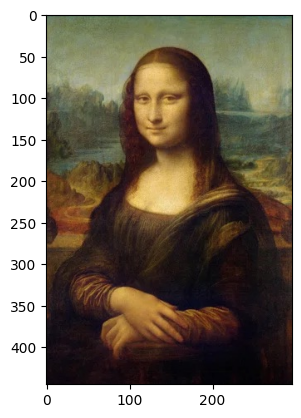

In [13]:
img_path = "images/painting-2.jpeg"
img_raw = Image.open(img_path)
img_np = load_512(img_raw, *(0,0,0,0), width=512, height=512)
inverter.init_prompt("")
_, ddim_latents = inverter.ddim_inversion(img_np)
initial_latent = ddim_latents[-1]
plt.imshow(img_raw)

We provide the sample edits done with the input image above. The editing scheme is the same with the face domain.

 28%|██▊       | 14/50 [00:00<00:01, 23.08it/s]

100%|██████████| 50/50 [00:05<00:00,  9.89it/s]


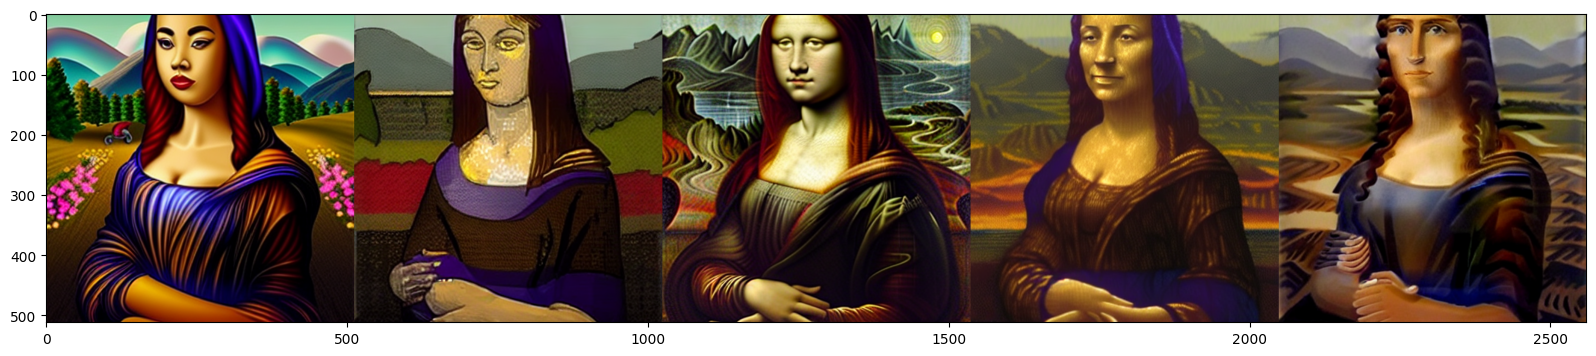

In [14]:
edited_images = []
# Art 1
out = pipe(prompt="", latents=initial_latent, editing_scale=directions[0][3], is_real_image=True,
    editing_prompt=directions[0][0], height=512, width=512, start_step=directions[0][1], end_step=directions[0][2], num_inference_steps=50).images[0]
edited_images.append(out)

# Art 2
out = pipe(prompt="", latents=initial_latent, editing_scale=directions[1][3], is_real_image=True,
    editing_prompt=directions[1][0], height=512, width=512, start_step=directions[1][1], end_step=directions[1][2], num_inference_steps=50).images[0]
edited_images.append(out)

# Art 3
out = pipe(prompt="", latents=initial_latent, editing_scale=directions[2][3], is_real_image=True,
    editing_prompt=directions[2][0], height=512, width=512, start_step=directions[2][1], end_step=directions[2][2], num_inference_steps=50).images[0]
edited_images.append(out)

# Art 4
out = pipe(prompt="", latents=initial_latent, editing_scale=directions[3][3], is_real_image=True,
    editing_prompt=directions[3][0], height=512, width=512, start_step=directions[3][1], end_step=directions[3][2], num_inference_steps=50).images[0]
edited_images.append(out)

# Art 5
out = pipe(prompt="", latents=initial_latent, editing_scale=directions[4][3], is_real_image=True,
    editing_prompt=directions[4][0], height=512, width=512, start_step=directions[4][1], end_step=directions[4][2], num_inference_steps=50).images[0]
edited_images.append(out)

grid = image_grid(edited_images, 1, len(edited_images))
plt.figure(figsize=(20, 4))
plt.imshow(grid)